# **Discretization**
Discretization refers to the process of transforming continuous numerical features (variables) into discrete bins or categories. This can be useful in various machine learning tasks, such as decision tree-based algorithms or Naive Bayes, where discrete features are more suitable. Scikit-learn provides a class called **KBinsDiscretizer** for this purpose.

<center><img src="https://www.cradle-cfd.com/dcms_media/image/en_column_basic_fig5.1.jpg" style="width:50%"></center>

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [2]:
df = pd.read_csv(r"D:\Coding\Datasets\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Select only necessary columns
df = df[["Age", "Fare", "Survived"]]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
# Check the information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [5]:
# Drop the null rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      714 non-null    float64
 2   Survived  714 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


## **Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1),
                                                    df["Survived"],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((499, 2), (215, 2))

In [8]:
x_train.head()

,Age,Fare
200,28.0,9.5000
439,31.0,10.5000
100,28.0,7.8958
117,29.0,21.0000
625,61.0,32.3208


## **Train a Classifier**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Instantiate a DecisionTreeClassifier object
dt_clf = DecisionTreeClassifier(random_state=0)

# Fit the training data
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
# Predict the test data
y_pred = dt_clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

## **Check the Accuracy**

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
print("Accuracy of Decision Tree Model:", accuracy_score(y_test, y_pred))

Accuracy of Decision Tree Model: 0.5906976744186047


In [14]:
print("Accuracy of Decision Tree Model after Cross Validation:",
      np.mean(cross_val_score(dt_clf, x_train, y_train, cv=10, scoring="accuracy")))

Accuracy of Decision Tree Model after Cross Validation: 0.6374285714285713


## **Apply Discretization**
In discretization, the "strategy" refers to the method or approach used to determine the bin edges or thresholds when converting continuous numerical features into discrete bins or categories. Scikit-learn's KBinsDiscretizer provides several strategies to choose from:

* **'uniform':** In this strategy, the bins are uniformly spaced across the range of the input data. It divides the range into equal-width intervals. This strategy is simple and can work well when the data distribution is approximately uniform.

* **'quantile':** This strategy divides the data into bins such that each bin contains approximately the same number of data points. It is useful when you want to ensure that each bin has a roughly equal number of samples, even if the data distribution is skewed.

* **'kmeans':** In the 'kmeans' strategy, the bin edges are determined using the k-means clustering algorithm. The number of bins is specified by the n_clusters parameter. This strategy can work well when the data has complex distribution patterns and you want to capture those patterns in the discretization.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [16]:
# Create a discretization object for "Age" column
kbin_age = KBinsDiscretizer(n_bins=10, strategy="quantile", encode="ordinal")

# Create a discretization object for "Fare" column
kbin_fare = KBinsDiscretizer(n_bins=10, strategy="quantile", encode="ordinal")

In [17]:
# Create a ColumnTransformer object for transforming the columns
transformer = ColumnTransformer(transformers=[("trf1", kbin_age, ["Age"]),
                                             ("trf2", kbin_fare, ["Fare"])],
                                remainder="passthrough")

In [18]:
# Fit and transform the training data
x_train_transformed = transformer.fit_transform(x_train)

# Transform the testing data
x_test_transformed = transformer.transform(x_test)

In [19]:
# Check the name of the transformers
transformer.named_transformers_

{'trf1': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'trf2': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [20]:
# Check the first transformer
transformer.named_transformers_["trf1"]

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [21]:
# Check the number of bins for the first transformer
transformer.named_transformers_["trf1"].n_bins_

array([10])

In [22]:
# Check the discretization intervals for both the transformers
transformer.named_transformers_["trf1"].bin_edges_

array([array([ 0.67, 13.6 , 18.  , 22.  , 25.  , 28.  , 31.  , 35.  , 41.  ,
              49.2 , 74.  ])                                                ],
      dtype=object)

In [23]:
transformer.named_transformers_["trf2"].bin_edges_

array([array([  0.     ,   7.75   ,   7.925  ,   9.08668,  12.72   ,  15.55   ,
               26.     ,  29.125  ,  46.9    ,  78.92   , 512.3292 ])          ],
      dtype=object)

In [24]:
# Convert the transformed array into pandas dataframe
x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=["Age", "Fare"])
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=["Age", "Fare"])

In [25]:
x_train_transformed_df.head()

,Age,Fare
0,5.0,3.0
1,6.0,3.0
2,5.0,1.0
3,5.0,5.0
4,9.0,7.0


In [26]:
# Create a dataframe to compare the transformed values
output = pd.DataFrame({
    "age": x_train["Age"],
    "age_trf": x_train_transformed[:, 0],
    "fare": x_train["Fare"],
    "fare_trf": x_train_transformed[:, 1]
})

In [27]:
output["age_labels"] = pd.cut(x=x_train["Age"], 
                              bins=transformer.named_transformers_["trf1"].bin_edges_[0].tolist())
output["fare_labels"] = pd.cut(x=x_train["Fare"],
                               bins=transformer.named_transformers_["trf2"].bin_edges_[0].tolist())
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
200,28.0,5.0,9.5000,3.0,"(25.0, 28.0]","(9.087, 12.72]"
439,31.0,6.0,10.5000,3.0,"(28.0, 31.0]","(9.087, 12.72]"
100,28.0,5.0,7.8958,1.0,"(25.0, 28.0]","(7.75, 7.925]"
117,29.0,5.0,21.0000,5.0,"(28.0, 31.0]","(15.55, 26.0]"
625,61.0,9.0,32.3208,7.0,"(49.2, 74.0]","(29.125, 46.9]"
...,...,...,...,...,...,...
883,28.0,5.0,10.5000,3.0,"(25.0, 28.0]","(9.087, 12.72]"
238,19.0,2.0,10.5000,3.0,"(18.0, 22.0]","(9.087, 12.72]"
789,46.0,8.0,79.2000,9.0,"(41.0, 49.2]","(78.92, 512.329]"
704,26.0,4.0,7.8542,1.0,"(25.0, 28.0]","(7.75, 7.925]"


### **Train a Classifier with Discretized Data**

In [28]:
dt_clf = DecisionTreeClassifier(random_state=0)

# Fit the transformed training data
dt_clf.fit(x_train_transformed_df, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
# Predict the transformed testing data
y_pred = dt_clf.predict(x_test_transformed_df)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

### **Check the Accuracy**

In [30]:
print("Accuracy of Decision Tree Model:", accuracy_score(y_test, y_pred))

Accuracy of Decision Tree Model: 0.6604651162790698


In [31]:
# Check the accuracy after cross validation
print("Accuracy of Decision Tree Model after Cross Validation:",
      np.mean(cross_val_score(dt_clf, x_train_transformed_df, y_train, cv=10, scoring="accuracy")))

Accuracy of Decision Tree Model after Cross Validation: 0.6695102040816325


## **Create a Function to Plot the Discretization**

In [32]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, strategy=strategy, encode="ordinal")
    kbin_fare = KBinsDiscretizer(n_bins=bins, strategy=strategy, encode="ordinal")
    
    transformer = ColumnTransformer(transformers=[("trf1", kbin_age, [0]),
                                                  ("trf2", kbin_fare, [1])],
                                    remainder="passthrough")
    
    x_transformed = transformer.fit_transform(x_train)
    
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.histplot(x_train["Age"], bins=bins)
    plt.title(f"Age Before Discretization ({strategy})")
    
    plt.subplot(122)
    sns.histplot(x_train_transformed[:, 0])
    plt.title(f"Age After Discretization ({strategy})")
    
    plt.show()
    
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.histplot(x_train["Fare"], bins=bins)
    plt.title(f"Fare Before Discretization ({strategy})")
    
    plt.subplot(122)
    sns.histplot(x_train_transformed[:, 1])
    plt.title(f"Fare After Discretization ({strategy})")
    plt.show()

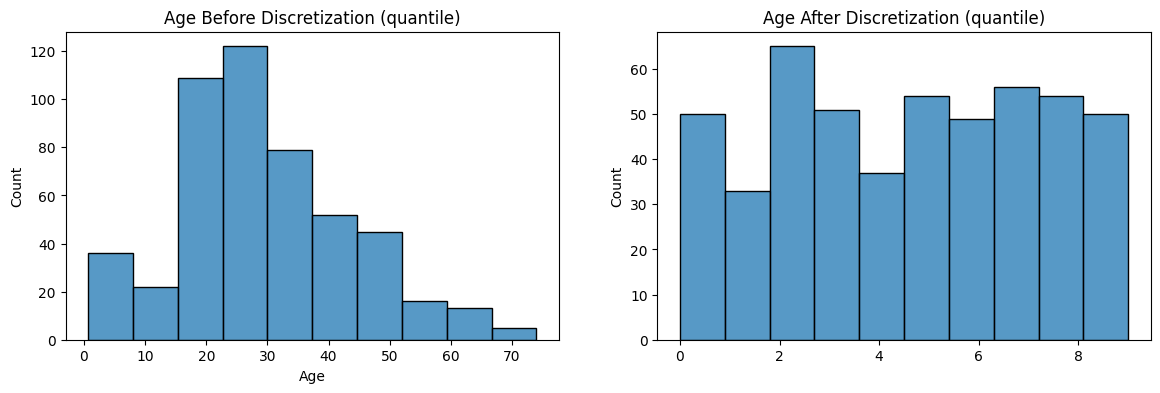

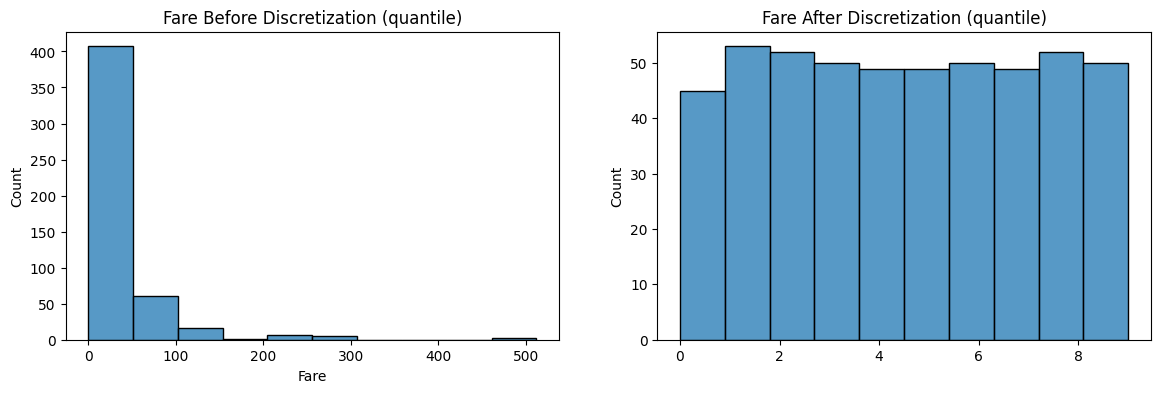

In [33]:
# Display the tranformation after applying 'quantile' strategy
discretize(10, "quantile")

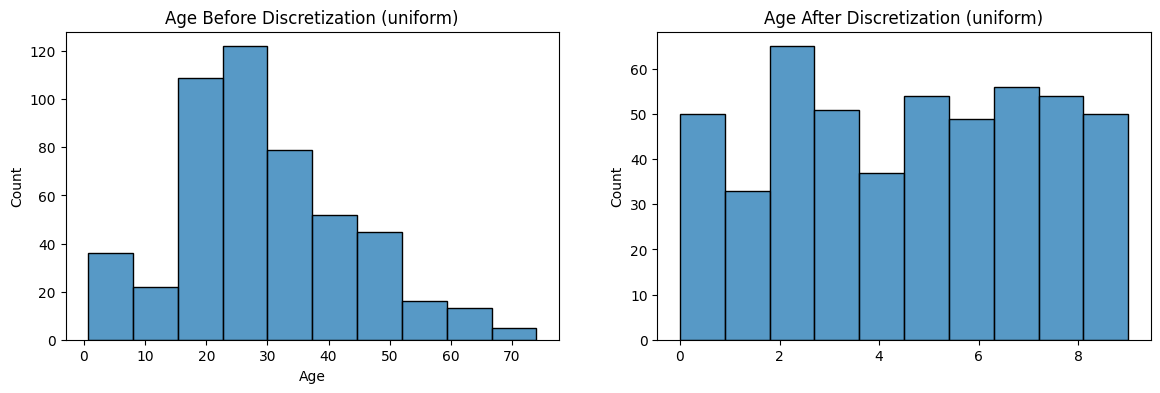

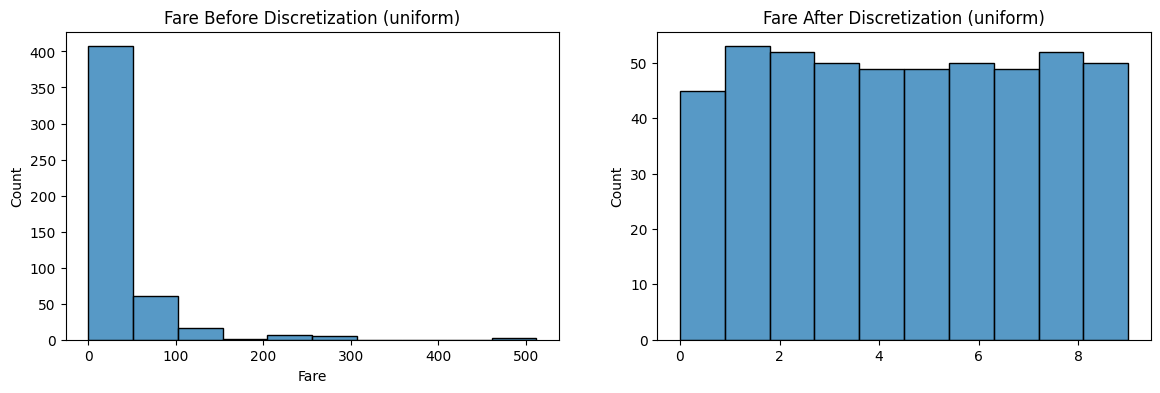

In [34]:
# Display the tranformation after applying 'uniform' strategy
discretize(10, "uniform")